# [NLP] Assignment 1: Tokenization

In this assignment , you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks , create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

In [309]:
import requests
import zipfile
import io
import os

def download_and_extract_zip(url , destination_folder):
    os.makedirs(destination_folder , exist_ok=True)

    # Download the zip file
    response = requests.get(url)

    if response.status_code == 200:
        # Unzip the content
        with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
            zip_file.extractall(destination_folder)
        print(f"Successfully downloaded and extracted to {destination_folder}")
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")

zip_url = "https://drive.usercontent.google.com/u/0/uc?id=15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw&export=download"
destination_folder = "/content/"

download_and_extract_zip(zip_url , destination_folder)


Successfully downloaded and extracted to /content/


## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman  , Old  , age  , has  , made  , NATO  , !


    1. Input tweet
    Camping in Maine for the weekend. Hey Dad , Mama Loves YOU: http://www.mamapalooza.com

    1. Tokenized tweet
    Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com

    2. Input tweet
    Its american tradition bitch

    2. Tokenized tweet
    Its , american , tradition , bitch

    3. Input tweet
    @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones

    3. Tokenized tweet
    @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I'm , sure , I , hear , a , tiny , squeak , ... , Then , louder , ones

    4. Input tweet
    " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy , I tweet because I'm free"" LOL!"

    4. Tokenized tweet
    " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , <--- , "" , I , tweet , because , I'm , happy , , , I , tweet , because , I'm , free , "" , LOL , ! , "

    5. Input tweet
    Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m

    5. Tokenized tweet
    Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy's , done , it , aga , .. , http://tinyurl.com/lb5p6m
    
    6. Input tweet
    @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.

    6. Tokenized tweet
    @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it's , kinda , cool , when , u , get , up , to , speed , .
    
    7. Input tweet
    iPhone activation delays continue , Apple offers $30 http://twt.gs/l3Ki

    7. Tokenized tweet
    iPhone , activation , delays , continue , , , Apple , offers , $30 , http://twt.gs/l3Ki
    
    8. Input tweet
    RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!

    8. Tokenized tweet
    RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25MB , http://bit.ly/62mjw , Nice , !!!
    
    9. Input tweet
    RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI

    9. Tokenized tweet
    RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing's , Sales/Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI

    10. Input tweet
    Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)

    10. Tokenized tweet
    Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

    11. Input tweet
    Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland

    11. Tokenized tweet
    Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

    12. Input tweet
    @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both

    12. Tokenized tweet
    @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can't , do , both

    13. Input tweet
    Incoming: Frightened Rabbit , Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv

    13. Tokenized tweet
    Incoming , : , Frightened , Rabbit , , , Sept. , 22 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , .. , http://tinyurl.com/nz6xcv

    14. Input tweet
    Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)

    14. Tokenized tweet
    Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , )
    
    15. Input tweet
    Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk

    15. Tokenized tweet
    Ik , weet , niet , wie , er , achter , de , T-Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , 'corporate' , taalgebruik , ... , Best , vreemd , eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

* Your code should have docstrings and comments (10 points).

In [291]:
from typing import List
from collections import defaultdict
import re

class BPETokenizer:
    """
    Byte Pair Encoding (BPE) Tokenizer class.
    """

    def __init__(self, vocab_size: int) -> None:
        """
        Initializes the BPE Tokenizer with a specified vocabulary size.
        """
        self.vocab_size = vocab_size
        self.vocab = ["</w>"]  # Initialize with end-of-word token
        self.word_freqs = defaultdict(int)  # Frequency of words in corpus
        self.splits = defaultdict(int)  # Dictionary to store splits of words
        self.merges = defaultdict(int)  # Dictionary to store merged pairs

    def train(self, corpus: List[str]) -> None:
        """
        Trains the BPE Tokenizer on the given corpus to build the vocabulary.
        """
        # Step 1: Build word frequencies
        self._build_word_frequencies(corpus)

        # Step 2: Build initial vocabulary
        self._build_initial_vocab()

        # Step 3: Merge pairs until vocabulary size is reached
        while len(self.vocab) < self.vocab_size:
            frequencies = self._calculate_pair_frequencies()
            most_frequent_pair = max(frequencies, key=frequencies.get)
            self._merge_and_update_vocab(most_frequent_pair)

    def _pretokenize_text(self, text: str) -> str:
        """
        Pre-tokenizes text by separating punctuation characters into separate words.
        """
        # Define punctuation characters
        punctuation = r'[.,!?;:]'

        # Split text using punctuation as delimiters
        pre_tokenized_text = re.sub(punctuation, r' \g<0> ', text)

        return pre_tokenized_text

    def _build_word_frequencies(self, corpus: List[str]) -> None:
        """
        Builds word frequencies from the given corpus.
        """
        for text in corpus:
            words = self._pretokenize_text(text).split()
            for word in words:
                self.word_freqs[word] += 1

    def _build_initial_vocab(self) -> None:
        """
        Builds the initial vocabulary based on the word frequencies.
        """
        for word in self.word_freqs.keys():
            for letter in word:
                if letter not in self.vocab:
                    self.vocab.append(letter)
        self.splits = {word: [c for c in word] for word in self.word_freqs.keys()}

    def _calculate_pair_frequencies(self) -> defaultdict:
        """
        Calculates frequencies of character pairs in the current vocabulary.
        """
        frequencies = defaultdict(int)
        for word, freq in self.word_freqs.items():
            chars = self.splits[word]
            for i in range(len(chars) - 1):
                frequencies[(chars[i], chars[i+1])] += freq
        return frequencies

    def _merge_and_update_vocab(self, pair) -> None:
        """
        Merges the most frequent pair and updates the vocabulary accordingly.
        """
        merged_pair = pair[0] + pair[1]
        for word, chars in self.splits.items():
            i = 0
            while i < len(chars) - 1:
                if chars[i:i+2] == [pair[0], pair[1]]:
                    chars[i:i+2] = [merged_pair]
                i += 1
            self.splits[word] = chars
        self.merges[pair] = merged_pair
        self.vocab.append(merged_pair)

    def tokenize(self, text: str) -> List[str]:
        """
        Tokenizes the input text using the learned vocabulary.
        """
        tokens = []
        words = self._pretokenize_text(text).split()
        for word in words:
            tokenized_word = self.tokenize_word(word)
            tokens.extend(tokenized_word)
        return tokens

    def tokenize_word(self, word: str) -> List[str]:
        """
        Tokenizes a single word into subwords using the learned vocabulary.
        """
        tokens = []
        chars = [char for char in word]
        i = 0
        while i < len(chars):
            longest_subword = chars[i]
            for j in range(i + 1, len(chars) + 1):
                subword = ''.join(chars[i:j])
                if subword in self.vocab:
                    longest_subword = subword
            tokens.append(longest_subword)
            i += len(longest_subword)
        return tokens

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example , train the BPE tokenizer with `vocab_size` of [base_vocab_size , 250 , 500 , 750 , 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [298]:
# Step 1: Load the tweets [corpus]

f1 = open("file1", "r").readlines()
f2 = open("file2", "r").readlines()
f3 = open("file3", "r").readlines()
f4 = open("file4", "r").readlines()
f5 = open("file4", "r").readlines()

corpus = f1+f2+f3+f4+f5

In [299]:
corpus[1]

'" Could journos please stop putting the word ""gate"" after everything they write... gate."\n'

100%|██████████| 220/220 [00:00<00:00, 516.82it/s]


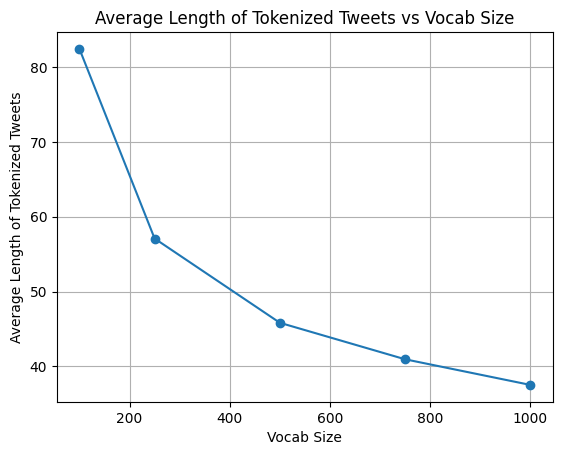

In [300]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Step 2: Define vocab_size values
vocab_sizes = [100, 250, 500, 750, 1000]

# Step 3-6: Train the tokenizer with different vocab_size and analyze the tokenized tweets
avg_lengths = []

for vocab_size in vocab_sizes:
    tokenizer = BPETokenizer(vocab_size)
    tokenizer.train(corpus)  # Train the tokenizer on tweet texts

    # Tokenize tweets and calculate average length
    avg_length = sum(len(tokenizer.tokenize(tweet)) for tweet in tqdm(corpus)) / len(corpus)
    avg_lengths.append(avg_length)

# Step 7: Plot the dependency of the average length of the tokenized tweet by vocab_size
plt.plot(vocab_sizes, avg_lengths, marker='o')
plt.title('Average Length of Tokenized Tweets vs Vocab Size')
plt.xlabel('Vocab Size')
plt.ylabel('Average Length of Tokenized Tweets')
plt.grid(True)
plt.show()


Based on the plot, the preferable vocab_size would likely be around 500 or 750.

A vocab_size of 500 or 750 strikes a balance between capturing sufficient vocabulary to represent the language's nuances and keeping the average length of tokenized tweets manageable. This balance ensures that the tokenizer can effectively represent the diversity of words in the tweets while avoiding excessively long tokenized sequences that may increase computational overhead and memory usage.

Therefore, a vocab_size of 500 or 750 is preferable as it offers a good compromise between vocabulary coverage and tokenization efficiency.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why.

In [311]:
# Step 1: Load "French tweets dataset" from Kaggle
# https://www.kaggle.com/datasets/hbaflast/french-twitter-sentiment-analysis?resource=download
tweets_df = pd.read_csv("french_tweets_small.csv")


100%|██████████| 200/200 [00:00<00:00, 497.93it/s]

100%|██████████| 200/200 [00:00<00:00, 791.24it/s]

100%|██████████| 200/200 [00:00<00:00, 1540.11it/s]

100%|██████████| 200/200 [00:00<00:00, 1300.27it/s]

100%|██████████| 200/200 [00:00<00:00, 1086.83it/s]


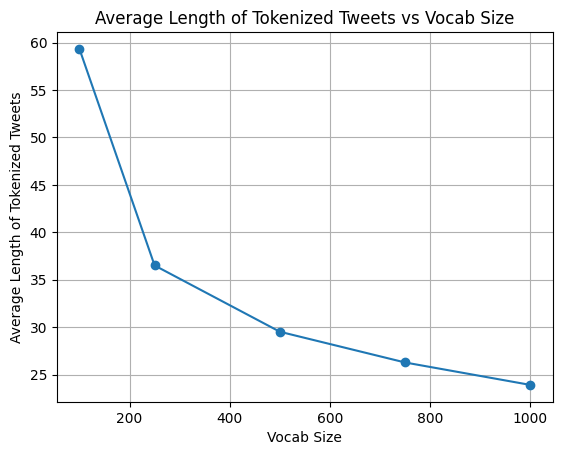

In [306]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Step 2: Define vocab_size values
vocab_sizes = [100, 250, 500, 750, 1000]

# Step 3-6: Train the tokenizer with different vocab_size and analyze the tokenized tweets
avg_lengths = []

for vocab_size in vocab_sizes:
    tokenizer = BPETokenizer(vocab_size)
    tokenizer.train(tweets_df['text'].tolist())  # Train the tokenizer on tweet texts

    # Tokenize tweets and calculate average length
    avg_length = sum(len(tokenizer.tokenize(tweet)) for tweet in tqdm(tweets_df['text'])) / len(tweets_df)
    avg_lengths.append(avg_length)

# Step 7: Plot the dependency of the average length of the tokenized tweet by vocab_size
plt.plot(vocab_sizes, avg_lengths, marker='o')
plt.title('Average Length of Tokenized Tweets vs Vocab Size')
plt.xlabel('Vocab Size')
plt.ylabel('Average Length of Tokenized Tweets')
plt.grid(True)
plt.show()

For a dataset with different language I chose "French tweets dataset" and there're two main reasons why the average length of the tokenized tweets is different:

1. Language Structure: French language structures, including grammar, syntax, and word usage, differ from English. This variation can affect how sentences are constructed and, consequently, their average length.

2. Vocabulary: French has a different vocabulary compared to English. It may have words with different lengths, word frequency distributions, and linguistic complexities. This diversity can influence the average length of tokenized sentences.

Overall, the differences in language structure and vocabulary contribute to variations in the average length of tokenized tweets.
And, as we can see on the plots, these differences are noticeable